<a href="https://colab.research.google.com/github/Anandtripathy/Predictive_Analytics/blob/master/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm

In [ ]:
virus=pd.read_csv("top_1000_pe_imports.csv")

In [ ]:
virus

hash  ...  malware
0      071e8c3f8922e186e57548cd4c703a5d  ...        1
1      33f8e6d08a6aae939f25a8e0d63dd523  ...        1
2      b68abd064e975e1c6d5f25e748663076  ...        1
3      72049be7bd30ea61297ea624ae198067  ...        1
4      c9b3700a77facf29172f32df6bc77f48  ...        1
...                                 ...  ...      ...
47575  9b917bab7f32188ae40c744f2be9aaf8  ...        1
47576  35a18ee05f75f04912018d9f462cb990  ...        1
47577  654139d715abcf7ecdddbef5a84f224b  ...        1
47578  078c9d4e7be4819a06974c6f292a4857  ...        1
47579  28a46c37f3a894f6d4ce8c38c2ff1fb1  ...        0

[47580 rows x 1002 columns]

In [ ]:
virus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47580 entries, 0 to 47579
Columns: 1002 entries, hash to malware
dtypes: int64(1001), object(1)
memory usage: 363.7+ MB


In [ ]:
virus.head(10)

hash  GetProcAddress  ...  LookupAccountSidW  malware
0  071e8c3f8922e186e57548cd4c703a5d               1  ...                  0        1
1  33f8e6d08a6aae939f25a8e0d63dd523               1  ...                  0        1
2  b68abd064e975e1c6d5f25e748663076               1  ...                  0        1
3  72049be7bd30ea61297ea624ae198067               1  ...                  0        1
4  c9b3700a77facf29172f32df6bc77f48               1  ...                  0        1
5  cc6217be863e606e49da90fee2252f52               0  ...                  0        1
6  f7a1a3c38809d807b3f5f4cc00b1e9b7               1  ...                  0        1
7  a2597ae310f53a6b70c6951a3245dc4a               1  ...                  0        1
8  164b56522eb24164184460f8523ed7e2               1  ...                  0        1
9  56ae1459ba61a14eb119982d6ec793d7               1  ...                  0        1

[10 rows x 1002 columns]

In [ ]:
virus.tail()

hash  ...  malware
47575  9b917bab7f32188ae40c744f2be9aaf8  ...        1
47576  35a18ee05f75f04912018d9f462cb990  ...        1
47577  654139d715abcf7ecdddbef5a84f224b  ...        1
47578  078c9d4e7be4819a06974c6f292a4857  ...        1
47579  28a46c37f3a894f6d4ce8c38c2ff1fb1  ...        0

[5 rows x 1002 columns]

In [ ]:
virus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47580 entries, 0 to 47579
Columns: 1002 entries, hash to malware
dtypes: int64(1001), object(1)
memory usage: 363.7+ MB


In [ ]:
virus.min()

hash                         0000f373c9207f635ce55526a5f93c67
GetProcAddress                                              0
ExitProcess                                                 0
WriteFile                                                   0
GetLastError                                                0
                                           ...               
GetSecurityDescriptorDacl                                   0
FindFirstFreeAce                                            0
GetTimeFormatW                                              0
LookupAccountSidW                                           0
malware                                                     0
Length: 1002, dtype: object

In [ ]:
virus.max()

hash                         fffe63678ee9a495bf2435f7037c551a
GetProcAddress                                              1
ExitProcess                                                 1
WriteFile                                                   1
GetLastError                                                1
                                           ...               
GetSecurityDescriptorDacl                                   1
FindFirstFreeAce                                            1
GetTimeFormatW                                              1
LookupAccountSidW                                           1
malware                                                     1
Length: 1002, dtype: object

In [ ]:
virus.mean()

GetProcAddress               0.872236
ExitProcess                  0.847079
WriteFile                    0.760004
GetLastError                 0.783459
CloseHandle                  0.770618
                               ...   
GetSecurityDescriptorDacl    0.024191
FindFirstFreeAce             0.024149
GetTimeFormatW               0.023939
LookupAccountSidW            0.023686
malware                      0.959458
Length: 1001, dtype: float64

In [ ]:
virus.describe()

GetProcAddress   ExitProcess  ...  LookupAccountSidW       malware
count    47580.000000  47580.000000  ...       47580.000000  47580.000000
mean         0.872236      0.847079  ...           0.023686      0.959458
std          0.333830      0.359915  ...           0.152072      0.197229
min          0.000000      0.000000  ...           0.000000      0.000000
25%          1.000000      1.000000  ...           0.000000      1.000000
50%          1.000000      1.000000  ...           0.000000      1.000000
75%          1.000000      1.000000  ...           0.000000      1.000000
max          1.000000      1.000000  ...           1.000000      1.000000

[8 rows x 1001 columns]

In [ ]:
virus.keys()

Index(['hash', 'GetProcAddress', 'ExitProcess', 'WriteFile', 'GetLastError',
       'CloseHandle', 'FreeLibrary', 'Sleep', 'GetStdHandle',
       'MultiByteToWideChar',
       ...
       'bind', 'RegEnumKeyExA', 'WinHttpOpen', '_controlfp', 'WinExec',
       'GetSecurityDescriptorDacl', 'FindFirstFreeAce', 'GetTimeFormatW',
       'LookupAccountSidW', 'malware'],
      dtype='object', length=1002)

In [ ]:
virus.isnull().any()

hash                         False
GetProcAddress               False
ExitProcess                  False
WriteFile                    False
GetLastError                 False
                             ...  
GetSecurityDescriptorDacl    False
FindFirstFreeAce             False
GetTimeFormatW               False
LookupAccountSidW            False
malware                      False
Length: 1002, dtype: bool

In [ ]:
x= virus.drop(['hash'],axis=1)

In [ ]:
y = virus['hash']

In [ ]:
x.shape

(47580, 1001)

In [ ]:
y.shape

(47580,)

In [ ]:
np.isnan(virus.any()) #and gets False
np.isfinite(virus.all()) #and gets True

hash                         True
GetProcAddress               True
ExitProcess                  True
WriteFile                    True
GetLastError                 True
                             ... 
GetSecurityDescriptorDacl    True
FindFirstFreeAce             True
GetTimeFormatW               True
LookupAccountSidW            True
malware                      True
Length: 1002, dtype: bool

In [ ]:
virus.isnull().any()

hash                         False
GetProcAddress               False
ExitProcess                  False
WriteFile                    False
GetLastError                 False
                             ...  
GetSecurityDescriptorDacl    False
FindFirstFreeAce             False
GetTimeFormatW               False
LookupAccountSidW            False
malware                      False
Length: 1002, dtype: bool

In [ ]:
virus.isnull().any()
virus = virus.fillna(method='ffill')

In [ ]:
virus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47580 entries, 0 to 47579
Columns: 1002 entries, hash to malware
dtypes: int64(1001), object(1)
memory usage: 363.7+ MB


In [ ]:
virus.isnull().any()

hash                         False
GetProcAddress               False
ExitProcess                  False
WriteFile                    False
GetLastError                 False
                             ...  
GetSecurityDescriptorDacl    False
FindFirstFreeAce             False
GetTimeFormatW               False
LookupAccountSidW            False
malware                      False
Length: 1002, dtype: bool

In [ ]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [ ]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# top_1000_pe_imports.csv has 47580 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('top_1000_pe_imports.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'top_1000_pe_imports.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 1002 columns


In [ ]:
plotPerColumnDistribution(df1, 1, 1)

ValueError: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fca7426f840> (for post_execute):


ValueError: ignored

ValueError: ignored

<Figure size 480x640640 with 1 Axes>

In [ ]:
plotCorrelationMatrix(df1, 250)

In [ ]:
plotScatterMatrix(df1, 20, 10)

                           GetProcAddress  ...   malware
GetProcAddress                   1.000000  ...  0.030180
ExitProcess                      0.847768  ...  0.123767
WriteFile                        0.649377  ...  0.109550
GetLastError                     0.637042  ... -0.004581
CloseHandle                      0.636808  ...  0.034856
...                                   ...  ...       ...
GetSecurityDescriptorDacl        0.056162  ... -0.004394
FindFirstFreeAce                 0.058566  ...  0.032337
GetTimeFormatW                   0.049229  ... -0.062619
LookupAccountSidW                0.054231  ... -0.030349
malware                          0.030180  ...  1.000000

[1001 rows x 1001 columns]


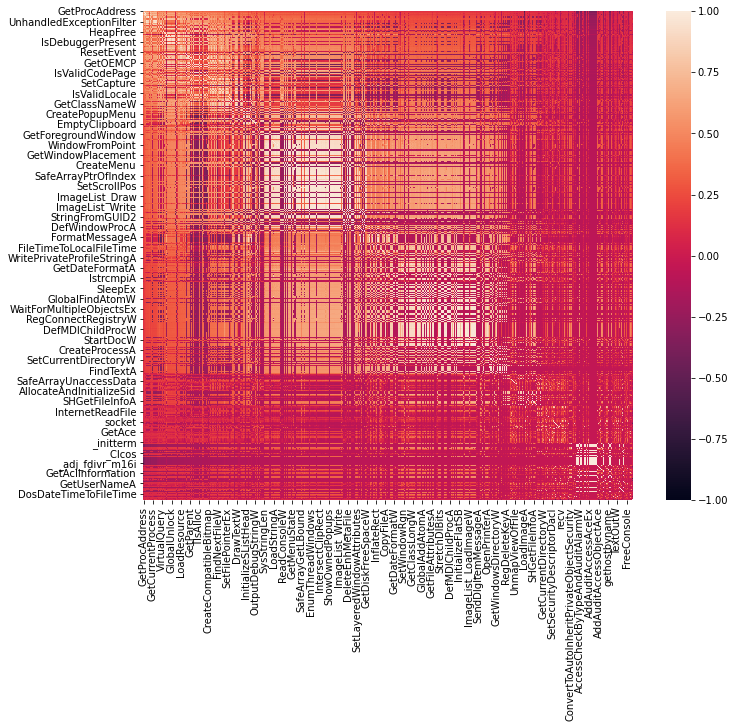

In [ ]:
import seaborn as sns
corrmat = virus.corr()
f, ax = plt.subplots(figsize=(12, 9))
print(corrmat)
sns.heatmap(corrmat, vmax=1,vmin=-1, square=True);